In [62]:
import LT.box as B
import numpy as np

ACCELERATING_VOLTAGE = [200,250,300,400] ##Constant Values
ELECTRON_MASS = 9.10938356e-31 ## Constant Values 
COIL_TURNS= 132 ## Constant Value
COIL_RADIUS= 0.14 ## Constant Value [Meter]
COIL_RADIUS_UNCERTAINTY= 0.45 ## Constant Value
CURRENT_UNCERTAINTY= 0.1
VOLTAGE_UNCERTAINTY= 1
MU_0 = (10**(-7)) * 4* np.pi ## Constant Value

In [63]:
class VoltageTrial:
    """
    Represents a set of voltage trials in a physics experiment, 
    each with a different coil radius.
    """
    def __init__(self, voltage:int, trial_currents, trial_path_diameter):
        """
        Initializes the voltage trials with specified parameters.
        :param voltage: A chosen voltage value.
        """
        
        #Loaded Values
        self.voltage = voltage
        self.currents = trial_currents  # Array to store current values
        self.path_diameter = trial_path_diameter
        
        #Calculated Values
        self.magnetic_fields = np.array([])  # Array to store magnetic field values
        self.magnetic_field_uncertainty = []  # Array to store magnetic field uncertainty values
        self.charge_mass_ratio = np.array([])  # Array to store charge to mass ratio values
        self.charge_mass_ratio_uncertainty = []  # Array to store charge to mass ratio uncertainty values

    def calculate_magnetic_fields(self):
        """
        Calculates and stores magnetic field values based on the currents and varying coil radii.
        """
        self.magnetic_fields = ((COIL_TURNS * self.currents* MU_0) / COIL_RADIUS) * ((4/5)**(3/2)) 
        
    def calculate_charge_mass_ratio(self):
        """
        Calculates and returns the charge to mass ratio of the electron.
        """
        path_radii = np.array([diameter_array / 2 for diameter_array in self.path_diameter])
        self.charge_mass_ratio = (2 * self.voltage) / (np.square(self.magnetic_fields) * np.square(path_radii))
        
    def calculate_magnetic_uncertainty(self):
        """
        Calculates and returns the uncertainty in the magnetic field.
        """
        for i_current in self.currents:
            partialN = np.square(i_current/COIL_RADIUS)
            partialR = np.square(COIL_TURNS/COIL_RADIUS)
            partialI = np.square(i_current * COIL_TURNS / np.square(COIL_RADIUS))
            self.magnetic_field_uncertainty.append(((4/5)**(3/2)) * MU_0 * (np.sqrt(partialN * np.square(0)+ partialI * np.square(CURRENT_UNCERTAINTY)+ partialR*np.square(COIL_RADIUS_UNCERTAINTY))))
        
    def calculate_charge_mass_ratio_uncertainty(self):
        """
        Calculates and returns the uncertainty in the charge to mass ratio.
        """
        partialB = np.square((-4*self.voltage)/(self.magnetic_fields**3 * np.square(COIL_RADIUS)))
        partialV = np.square(2/(self.magnetic_fields**2 * COIL_RADIUS**2))
        partialR = np.square((-4 * self.voltage)/(self.magnetic_fields**2 * COIL_RADIUS**3))
        
        self.charge_mass_ratio_uncertainty = np.sqrt(partialB * np.square(self.magnetic_field_uncertainty) + partialV * np.square(VOLTAGE_UNCERTAINTY) + partialR * np.square(COIL_RADIUS_UNCERTAINTY))

In [64]:
currents = []  # Read as, index is the trial and the value is the currents for that trial
currents.append(np.array([1.30,1.42,1.48,1.54,1.60,1.66,1.72,1.78,1.84,1.90]))
currents.append(np.array([1.42,1.48,1.54,1.60,1.66,1.72,1.78,1.84,1.90,1.96]))
currents.append(np.array([1.68,1.74,1.80,1.86,1.92,1.98,2.04,2.10,2.16,2.22]))
currents.append(np.array([1.98,2.04,2.10,2.16,2.22,2.28,2.34,2.40,2.46,2.52]))

path_diameter = []# Read as, index is the trial and the value is the path radii for that trial
path_diameter.append(np.array([8.6,8.3,8.0,7.6,7.4,7.2,6.8,6.6,6.4,6.2]))
path_diameter.append(np.array([9.6,9.2,8.7,8.4,8.1,7.9,7.6,7.3,7.1,6.8]))
path_diameter.append(np.array([8.9,8.6,8.4,8.1,7.8,7.6,7.4,7.1,6.9,6.7]))
path_diameter.append(np.array([8.9,8.7,8.4,8.2,7.9,7.7,7.5,7.4,7.2,7.9,6.9]))

path_diameter_uncertainty = [] # Read as, index is the trial and the value is the path radii uncertainty for that trial
path_diameter_uncertainty.append(np.array([0.1,0.1,0.1,0.2,0.1,0.2,0.2,0.2,0.1,0.1]))
path_diameter_uncertainty.append(np.array([0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.2,0.2,0.2]))
path_diameter_uncertainty.append(np.array([0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.1,0.1,0.2]))
path_diameter_uncertainty.append(np.array([0.3,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1]))



In [65]:
trial_200 = VoltageTrial(200, currents[0], path_diameter[0])
trial_250 = VoltageTrial(250, currents[1], path_diameter[1])
trial_300 = VoltageTrial(300, currents[2], path_diameter[2])
trial_400 = VoltageTrial(400, currents[3], path_diameter[3])

In [66]:
trial_200.calculate_magnetic_fields()
trial_200.calculate_magnetic_uncertainty()
trial_200.calculate_charge_mass_ratio()
trial_200.calculate_charge_mass_ratio_uncertainty()

print(f"magnetic field: {trial_200.magnetic_fields[0]:.2e}")
print(f"Mag Uncertainty: {trial_200.magnetic_field_uncertainty[0]:.2e}")
print(f"E/M: {trial_200.charge_mass_ratio[0]:.2e}")
print(f"E/M Uncertainty: {trial_200.charge_mass_ratio_uncertainty[0]:.2e}")



magnetic field: 1.10e-03
Mag Uncertainty: 8.75e-04
E/M: 1.78e+07
E/M Uncertainty: 1.11e+11


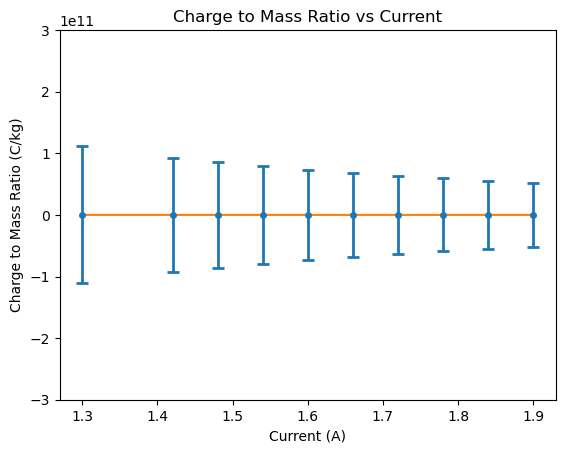

In [67]:
B.plot_exp(currents[0], trial_200.charge_mass_ratio, trial_200.charge_mass_ratio_uncertainty)
B.pl.ylim(-3e11, 3e11)
B.pl.title('Charge to Mass Ratio vs Current')
B.pl.xlabel('Current (A)')
B.pl.ylabel('Charge to Mass Ratio (C/kg)')


B.plot_line(currents[0], trial_200.charge_mass_ratio)

B.pl.show()

In [68]:
def sum_of_rem(trial_1:[],trial_2:[],trial_3:[],trial_4:[]):
    rem_sum = 0
    for i in trial_1:
        rem_sum += i

    for i in trial_2:
            rem_sum += i    
            
    for i in trial_3:
        rem_sum += i

    for i in trial_4:
            rem_sum += i
    
    print(rem_sum)
    
sum_of_rem(trial_200.charge_mass_ratio,trial_250.charge_mass_ratio,trial_300.charge_mass_ratio,trial_400.charge_mass_ratio)

161923718.041905
